In [203]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [204]:
df = pd.read_csv("data.csv")

In [205]:
df.head()

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89


In [206]:
df.shape

(727311, 153)

In [207]:
df.columns

Index(['hhid', 'case_id', 'person_id', 'case_type', 'age', 'gender',
       'is_alive', 'ailment_nature', 'treatment_nature', 'type_of_inst',
       ...
       'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss'],
      dtype='object', length=153)

In [208]:
df.isnull().sum()


hhid          0
case_id       0
person_id     0
case_type     0
age           0
             ..
stratum       0
substratum    0
subsample     0
weight_sc     0
weight_ss     0
Length: 153, dtype: int64

In [209]:
for item in df.columns:
    print(df[item].name," "*(55-len(df[item].name)), df[item].isnull().sum())


hhid                                                     0
case_id                                                  0
person_id                                                0
case_type                                                0
age                                                      0
gender                                                   0
is_alive                                                 0
ailment_nature                                           590146
treatment_nature                                         590146
type_of_inst                                             594023
surgery                                                  590364
place_of_hospitalization                                 590359
state_code                                               590333
major_source_of_finance                                  593434
X_ray_ECG_EEG_Scan                                       590365
reason_not_availing_govt_hospital                        682145
type_of_war

In [210]:
df["expenditure"].isnull().sum()

633541

In [211]:
#inpatient
df["expenditure"] = df["expenditure"].fillna(df["expenditure"]. median())

In [212]:
df["loss_of_hh_income_due_to_hospitalisation"] = df["loss_of_hh_income_due_to_hospitalisation"].fillna(df["loss_of_hh_income_due_to_hospitalisation"]. median())

In [213]:
df["total_amt_reimb_by_med_insurance"] = df["total_amt_reimb_by_med_insurance"].fillna(df["total_amt_reimb_by_med_insurance"]. median())

In [214]:
#outpatient
df["total_expenditure_Rs"] = df["total_expenditure_Rs"].fillna(df["total_expenditure_Rs"]. median())

In [215]:
df["hh_income_loss_Rs"] = df["hh_income_loss_Rs"].fillna(df["hh_income_loss_Rs"]. median())

In [216]:
df["total_amount_reimbursed_Rs"] = df["total_amount_reimbursed_Rs"].fillna(df["total_amount_reimbursed_Rs"]. median())

In [217]:
#children
df["immunisation_expenditure_last_365_days"] = df["immunisation_expenditure_last_365_days"].fillna(df["immunisation_expenditure_last_365_days"]. median())

In [218]:
#pregnant
df["prenatal_care_total_expenditure"] = df["prenatal_care_total_expenditure"].fillna(df["prenatal_care_total_expenditure"]. median())

In [219]:
df["delivery_expenditure_home"] = df["delivery_expenditure_home"].fillna(df["expenditure"]. median())

In [220]:
df["postnatal_care_expenditure"] = df["postnatal_care_expenditure"].fillna(df["expenditure"]. median())

In [221]:
#df[tot_expen] = prenatal+postnatal+immunisation+delievry
col_list= ['prenatal_care_total_expenditure', 'immunisation_expenditure_last_365_days', 'delivery_expenditure_home','postnatal_care_expenditure']
df['tot_expen'] = df[col_list].sum(axis=1)

In [222]:
for item in df.columns:
    print(df[item].name," "*(55-len(df[item].name)), df[item].isnull().sum())

hhid                                                     0
case_id                                                  0
person_id                                                0
case_type                                                0
age                                                      0
gender                                                   0
is_alive                                                 0
ailment_nature                                           590146
treatment_nature                                         590146
type_of_inst                                             594023
surgery                                                  590364
place_of_hospitalization                                 590359
state_code                                               590333
major_source_of_finance                                  593434
X_ray_ECG_EEG_Scan                                       590365
reason_not_availing_govt_hospital                        682145
type_of_war

nco_code                                                 35129
hh_type                                                  0
religion                                                 0
social_group                                             0
latrine_use                                              0
acc_to_latrine                                           111869
members_use_latrine                                      111879
src_drinking_water                                       0
arrangement_garbage_disposal                             0
src_of_energy_cooking                                    3
outbreak_comm_disease                                    0
med_insurance_premium                                    187842
hh_consumer_expen                                        0
stratum                                                  0
substratum                                               0
subsample                                                0
weight_sc                            

In [223]:
df["loss_of_hh_income_due_to_hospitalisation"].isnull().sum()

0

In [224]:
#final = expen(inpatient)+expen(outpatient)+expen(preg)
col_list= ['expenditure','total_expenditure_Rs','tot_expen']
df['final_expenditure'] = df[col_list].sum(axis=1)

In [225]:
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,2,0.0,16500,23,3,2,119.945,239.89,15000.0,22100.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,2,0.0,16500,23,3,2,119.945,239.89,25800.0,32900.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,2,0.0,16500,23,3,2,119.945,239.89,17530.0,24630.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,2,0.0,16500,23,3,2,119.945,239.89,15000.0,45100.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,2,0.0,16500,23,3,2,119.945,239.89,15000.0,22100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,2,0.0,8000,17,3,1,29.905,59.81,15100.0,22200.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,2,0.0,8000,17,3,1,29.905,59.81,15000.0,20200.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,2,0.0,8000,17,3,1,29.905,59.81,15000.0,22100.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,2,0.0,8000,17,3,1,29.905,59.81,15000.0,22100.0


In [226]:
col_list_hh_loss = ['hh_income_loss_Rs','loss_of_hh_income_due_to_hospitalisation']
df['final_hh_loss'] =df[col_list_hh_loss].sum(axis=1)

In [227]:
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,15000.0,22100.0,900.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,25800.0,32900.0,900.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,17530.0,24630.0,900.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,0.0,16500,23,3,2,119.945,239.89,15000.0,45100.0,5600.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,0.0,16500,23,3,2,119.945,239.89,15000.0,22100.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,15100.0,22200.0,900.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,0.0,8000,17,3,1,29.905,59.81,15000.0,20200.0,0.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,15000.0,22100.0,900.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,0.0,8000,17,3,1,29.905,59.81,15000.0,22100.0,900.0


In [228]:
col_list_reim = ['total_amount_reimbursed_Rs','total_amt_reimb_by_med_insurance']
df['final_reim_amt'] =df[col_list_reim].sum(axis=1)

In [229]:
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,25800.0,32900.0,900.0,0.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,17530.0,24630.0,900.0,0.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,16500,23,3,2,119.945,239.89,15000.0,45100.0,5600.0,0.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,16500,23,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,15100.0,22200.0,900.0,0.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,8000,17,3,1,29.905,59.81,15000.0,20200.0,0.0,0.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,8000,17,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0


In [230]:
df = df.assign(oope1=df['final_expenditure']-df['final_reim_amt'])
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,stratum,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt,oope1
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0,22100.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,25800.0,32900.0,900.0,0.0,32900.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,17530.0,24630.0,900.0,0.0,24630.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,23,3,2,119.945,239.89,15000.0,45100.0,5600.0,0.0,45100.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,23,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0,22100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,15100.0,22200.0,900.0,0.0,22200.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,17,3,1,29.905,59.81,15000.0,20200.0,0.0,0.0,20200.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0,22100.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,17,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0,22100.0


In [231]:
df = df.assign(oope2=df['final_expenditure']+df['final_hh_loss']-df['final_reim_amt'])
df

,hhid,case_id,person_id,case_type,age,gender,is_alive,ailment_nature,treatment_nature,type_of_inst,...,substratum,subsample,weight_sc,weight_ss,tot_expen,final_expenditure,final_hh_loss,final_reim_amt,oope1,oope2
0,500001101,1,1,dummy,32,1,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0,22100.0,23000.0
1,500001101,1,3,dummy,0,1,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,25800.0,32900.0,900.0,0.0,32900.0,33800.0
2,500001101,1,2,pregnant,26,2,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,17530.0,24630.0,900.0,0.0,24630.0,25530.0
3,500001101,1,2,inpatient,26,2,alive,88.0,1.0,3.0,...,3,2,119.945,239.89,15000.0,45100.0,5600.0,0.0,45100.0,50700.0
4,500001101,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,3,2,119.945,239.89,15000.0,22100.0,900.0,0.0,22100.0,23000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727306,576471102,1,3,dummy,0,2,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,15100.0,22200.0,900.0,0.0,22200.0,23100.0
727307,576471102,1,2,inpatient,26,2,alive,87.0,1.0,1.0,...,3,1,29.905,59.81,15000.0,20200.0,0.0,0.0,20200.0,20200.0
727308,576471102,1,2,dummy,26,2,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0,22100.0,23000.0
727309,576471102,1,1,dummy,29,1,alive,NaN,NaN,NaN,...,3,1,29.905,59.81,15000.0,22100.0,900.0,0.0,22100.0,23000.0


In [232]:
df_oope1 = df.groupby('hhid').apply(lambda x: np.sum(x['oope1']))

In [233]:
df4 = df_oope1.to_frame()
df4 = df4.reset_index(inplace=False)

In [234]:
df4.rename(columns = {0:'OOPE1'}, inplace = True)

In [235]:
df4

,hhid,OOPE1
0,500001101,146830.0
1,500001102,118960.0
2,500001201,162420.0
3,500001202,126480.0
4,500001203,70360.0
...,...,...
113818,699991301,66300.0
113819,699992101,151734.0
113820,699992201,173825.0
113821,699992202,175750.0


In [236]:
df_oope2 = df.groupby('hhid').apply(lambda x: np.sum(x['oope2']))

In [237]:
df5 = df_oope2.to_frame()
df5 = df5.reset_index(inplace=False)
df5

,hhid,0
0,500001101,156030.0
1,500001102,123860.0
2,500001201,173820.0
3,500001202,130980.0
4,500001203,74160.0
...,...,...
113818,699991301,69000.0
113819,699992101,160384.0
113820,699992201,186125.0
113821,699992202,186050.0


In [238]:
df5.rename(columns = {0:'OOPE2'}, inplace = True)

In [239]:
df5

,hhid,OOPE2
0,500001101,156030.0
1,500001102,123860.0
2,500001201,173820.0
3,500001202,130980.0
4,500001203,74160.0
...,...,...
113818,699991301,69000.0
113819,699992101,160384.0
113820,699992201,186125.0
113821,699992202,186050.0


In [240]:
df7 = pd.merge(df4, df5.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df7

,hhid,OOPE1,OOPE2
0,500001101,146830.0,156030.0
1,500001102,118960.0,123860.0
2,500001201,162420.0,173820.0
3,500001202,126480.0,130980.0
4,500001203,70360.0,74160.0
...,...,...,...
113818,699991301,66300.0,69000.0
113819,699992101,151734.0,160384.0
113820,699992201,173825.0,186125.0
113821,699992202,175750.0,186050.0


In [241]:
df_hh_consumer_expen = df.groupby('hhid').apply(lambda x: np.max(x['hh_consumer_expen']))


In [242]:
df6 = df_hh_consumer_expen.to_frame()
df6 = df6.reset_index(inplace=False)

In [243]:
df6.rename(columns = {0:'monthly_hh_income'}, inplace = True)
df6

,hhid,monthly_hh_income
0,500001101,16500
1,500001102,8000
2,500001201,32000
3,500001202,29800
4,500001203,6000
...,...,...
113818,699991301,3650
113819,699992101,6350
113820,699992201,9500
113821,699992202,5700


In [244]:
df_hh_final_expen = df.groupby('hhid').apply(lambda x: np.sum(x['final_expenditure']))

In [245]:
df9 = df_hh_final_expen.to_frame()
df9 = df9.reset_index(inplace=False)

In [246]:
df9.rename(columns = {0:'final_expenditure'}, inplace = True)
df9

,hhid,final_expenditure
0,500001101,146830.0
1,500001102,118960.0
2,500001201,162420.0
3,500001202,126480.0
4,500001203,70360.0
...,...,...
113818,699991301,66300.0
113819,699992101,151734.0
113820,699992201,173825.0
113821,699992202,175750.0


In [247]:
df_hh_final_loss = df.groupby('hhid').apply(lambda x: np.sum(x['final_hh_loss']))

In [248]:
df10 = df_hh_final_loss.to_frame()
df10 = df10.reset_index(inplace=False)

In [249]:
df10.rename(columns = {0:'final_hh_loss'}, inplace = True)
df10

,hhid,final_hh_loss
0,500001101,9200.0
1,500001102,4900.0
2,500001201,11400.0
3,500001202,4500.0
4,500001203,3800.0
...,...,...
113818,699991301,2700.0
113819,699992101,8650.0
113820,699992201,12300.0
113821,699992202,10300.0


In [250]:
df_hh_final_reim_amt = df.groupby('hhid').apply(lambda x: np.sum(x['final_reim_amt']))

In [251]:
df11 = df_hh_final_reim_amt.to_frame()
df11 = df11.reset_index(inplace=False)

In [252]:
df11.rename(columns = {0:'final_reim_amt'}, inplace = True)
df11

,hhid,final_reim_amt
0,500001101,0.0
1,500001102,0.0
2,500001201,0.0
3,500001202,0.0
4,500001203,0.0
...,...,...
113818,699991301,0.0
113819,699992101,0.0
113820,699992201,0.0
113821,699992202,0.0


In [253]:
df8 = pd.merge(df7, df6.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df8

,hhid,OOPE1,OOPE2,monthly_hh_income
0,500001101,146830.0,156030.0,16500
1,500001102,118960.0,123860.0,8000
2,500001201,162420.0,173820.0,32000
3,500001202,126480.0,130980.0,29800
4,500001203,70360.0,74160.0,6000
...,...,...,...,...
113818,699991301,66300.0,69000.0,3650
113819,699992101,151734.0,160384.0,6350
113820,699992201,173825.0,186125.0,9500
113821,699992202,175750.0,186050.0,5700


In [254]:
df8.columns

Index(['hhid', 'OOPE1', 'OOPE2', 'monthly_hh_income'], dtype='object')

In [255]:
df8.loc[:,"hhid"]

0         500001101
1         500001102
2         500001201
3         500001202
4         500001203
            ...    
113818    699991301
113819    699992101
113820    699992201
113821    699992202
113822    699992301
Name: hhid, Length: 113823, dtype: int64

In [256]:
conditions1 = [(df8['OOPE1']>=0.05*df8['monthly_hh_income']*12), (df8['OOPE1']<0.05*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_1_5']= np.select(conditions1, values)


In [257]:
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5
0,500001101,146830.0,156030.0,16500,1
1,500001102,118960.0,123860.0,8000,1
2,500001201,162420.0,173820.0,32000,1
3,500001202,126480.0,130980.0,29800,1
4,500001203,70360.0,74160.0,6000,1
...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1
113819,699992101,151734.0,160384.0,6350,1
113820,699992201,173825.0,186125.0,9500,1
113821,699992202,175750.0,186050.0,5700,1


In [258]:
conditions2 = [(df8['OOPE1']>=0.1*df8['monthly_hh_income']*12), (df8['OOPE1']<0.1*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_1_10']= np.select(conditions2, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10
0,500001101,146830.0,156030.0,16500,1,1
1,500001102,118960.0,123860.0,8000,1,1
2,500001201,162420.0,173820.0,32000,1,1
3,500001202,126480.0,130980.0,29800,1,1
4,500001203,70360.0,74160.0,6000,1,1
...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1
113819,699992101,151734.0,160384.0,6350,1,1
113820,699992201,173825.0,186125.0,9500,1,1
113821,699992202,175750.0,186050.0,5700,1,1


In [259]:
conditions3 = [(df8['OOPE1']>=0.15*df8['monthly_hh_income']*12), (df8['OOPE1']<0.15*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_1_15']= np.select(conditions3, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15
0,500001101,146830.0,156030.0,16500,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1
...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1


In [260]:
conditions4 = [(df8['OOPE1']>=0.25*df8['monthly_hh_income']*12), (df8['OOPE1']<0.25*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_1_25']= np.select(conditions4, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25
0,500001101,146830.0,156030.0,16500,1,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1,1
...,...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1,1


In [261]:
conditions5 = [(df8['OOPE2']>=0.05*df8['monthly_hh_income']*12), (df8['OOPE2']<0.05*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_2_5']= np.select(conditions5, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5
0,500001101,146830.0,156030.0,16500,1,1,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1,1,1


In [262]:
conditions6 = [(df8['OOPE2']>=0.1*df8['monthly_hh_income']*12), (df8['OOPE2']<0.1*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_2_10']= np.select(conditions6, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10
0,500001101,146830.0,156030.0,16500,1,1,1,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1,1,1,1


In [263]:
conditions7 = [(df8['OOPE2']>=0.15*df8['monthly_hh_income']*12), (df8['OOPE2']<0.15*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_2_15']= np.select(conditions7, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15
0,500001101,146830.0,156030.0,16500,1,1,1,1,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1,1,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1,1,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1,1,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1,1,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1,1,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1,1,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1,1,1,1,1


In [290]:
conditions8 = [(df8['OOPE2']>=0.25*df8['monthly_hh_income']*12), (df8['OOPE2']<0.25*df8['monthly_hh_income']*12)]
values = [1,0]
df8['che_2_25']= np.select(conditions8, values)
df8

,hhid,OOPE1,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15,che_2_25
0,500001101,146830.0,156030.0,16500,1,1,1,1,1,1,1,1
1,500001102,118960.0,123860.0,8000,1,1,1,1,1,1,1,1
2,500001201,162420.0,173820.0,32000,1,1,1,1,1,1,1,1
3,500001202,126480.0,130980.0,29800,1,1,1,1,1,1,1,1
4,500001203,70360.0,74160.0,6000,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,66300.0,69000.0,3650,1,1,1,1,1,1,1,1
113819,699992101,151734.0,160384.0,6350,1,1,1,1,1,1,1,1
113820,699992201,173825.0,186125.0,9500,1,1,1,1,1,1,1,1
113821,699992202,175750.0,186050.0,5700,1,1,1,1,1,1,1,1


In [291]:
df8['che_2_25'].value_counts()

1    112701
0      1122
Name: che_2_25, dtype: int64

In [292]:
df_hh = pd.read_csv("hh_info.csv")

In [293]:
df_hh.head()

,hhid,common_id,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,nic_code,nco_code,hh_type,religion,social_group,latrine_use,...,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,0015000075250122012323034220131101,3,2,49224.0,121,1,1,9,2,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001102,0015000075250122012323034220131102,4,2,7100.0,931,3,1,1,2,...,1,2.0,2,0.0,8000,23,3,2,119.945,239.89
2,500001201,0015000075250122012323034220131201,6,2,56101.0,121,1,1,9,1,...,2,2.0,1,0.0,32000,23,3,2,149.930,299.86
3,500001202,0015000075250122012323034220131202,5,2,7100.0,811,2,1,1,1,...,2,2.0,2,NaN,29800,23,3,2,149.930,299.86
4,500001203,0015000075250122012323034220131203,2,2,7100.0,931,3,1,1,2,...,1,2.0,1,0.0,6000,23,3,2,149.930,299.86


In [294]:
df_hh = df_hh.drop('common_id',axis=1)

In [295]:
df_hh

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,nic_code,nco_code,hh_type,religion,social_group,latrine_use,acc_to_latrine,...,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,3,2,49224.0,121,1,1,9,2,1.0,...,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001102,4,2,7100.0,931,3,1,1,2,1.0,...,1,2.0,2,0.0,8000,23,3,2,119.945,239.89
2,500001201,6,2,56101.0,121,1,1,9,1,1.0,...,2,2.0,1,0.0,32000,23,3,2,149.930,299.86
3,500001202,5,2,7100.0,811,2,1,1,1,1.0,...,2,2.0,2,NaN,29800,23,3,2,149.930,299.86
4,500001203,2,2,7100.0,931,3,1,1,2,1.0,...,1,2.0,1,0.0,6000,23,3,2,149.930,299.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,1124.0,920.0,5,1,2,2,1.0,...,1,2.0,2,0.0,3650,18,2,2,3234.090,6468.18
113819,699992101,5,2,47110.0,522.0,6,1,3,2,1.0,...,1,2.0,2,NaN,6350,18,2,2,210.920,421.84
113820,699992201,7,2,1124.0,920.0,5,1,2,4,9.0,...,1,1.0,1,NaN,9500,18,2,2,738.215,1476.43
113821,699992202,7,2,1124.0,611.0,1,1,2,2,1.0,...,1,2.0,2,NaN,5700,18,2,2,738.215,1476.43


In [296]:
df_hh.isnull().sum()

hhid                                                         0
hh_size                                                      0
paid_share_childbirth_expen_for_non_HHD_female_member        0
nic_code                                                  8140
nco_code                                                  8140
hh_type                                                      0
religion                                                     0
social_group                                                 0
latrine_use                                                  0
acc_to_latrine                                           17398
members_use_latrine                                      17399
src_drinking_water                                           0
arrangement_garbage_disposal                                 0
src_of_energy_cooking                                        1
outbreak_comm_disease                                        0
med_insurance_premium                                  

In [297]:
df_hh["med_insurance_premium"] = df_hh["med_insurance_premium"].fillna(df_hh["med_insurance_premium"]. median())

In [298]:
df_hh["acc_to_latrine"] = df_hh["acc_to_latrine"].fillna(df_hh["acc_to_latrine"]. median())
df_hh["members_use_latrine"] = df_hh["members_use_latrine"].fillna(df_hh["members_use_latrine"]. median())

In [299]:
df_hh = df_hh.drop('nic_code', axis=1)

In [300]:
df_hh = df_hh.drop('nco_code', axis=1)

In [301]:
df_hh.head()

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,arrangement_garbage_disposal,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss
0,500001101,3,2,1,1,9,2,1.0,2.0,4,2,2.0,2,0.0,16500,23,3,2,119.945,239.89
1,500001102,4,2,3,1,1,2,1.0,3.0,4,1,2.0,2,0.0,8000,23,3,2,119.945,239.89
2,500001201,6,2,1,1,9,1,1.0,6.0,4,2,2.0,1,0.0,32000,23,3,2,149.930,299.86
3,500001202,5,2,2,1,1,1,1.0,5.0,4,2,2.0,2,0.0,29800,23,3,2,149.930,299.86
4,500001203,2,2,3,1,1,2,1.0,2.0,4,1,2.0,1,0.0,6000,23,3,2,149.930,299.86


In [302]:
df_hh.isnull().sum()

hhid                                                     0
hh_size                                                  0
paid_share_childbirth_expen_for_non_HHD_female_member    0
hh_type                                                  0
religion                                                 0
social_group                                             0
latrine_use                                              0
acc_to_latrine                                           0
members_use_latrine                                      0
src_drinking_water                                       0
arrangement_garbage_disposal                             0
src_of_energy_cooking                                    1
outbreak_comm_disease                                    0
med_insurance_premium                                    0
hh_consumer_expen                                        0
stratum                                                  0
substratum                                              

In [303]:
df_hh["src_of_energy_cooking"] = df_hh["src_of_energy_cooking"].fillna(df_hh["src_of_energy_cooking"]. median())

In [304]:
df_hh.isnull().sum()

hhid                                                     0
hh_size                                                  0
paid_share_childbirth_expen_for_non_HHD_female_member    0
hh_type                                                  0
religion                                                 0
social_group                                             0
latrine_use                                              0
acc_to_latrine                                           0
members_use_latrine                                      0
src_drinking_water                                       0
arrangement_garbage_disposal                             0
src_of_energy_cooking                                    0
outbreak_comm_disease                                    0
med_insurance_premium                                    0
hh_consumer_expen                                        0
stratum                                                  0
substratum                                              

In [305]:
df_hh.shape

(113823, 20)

In [306]:
df_hh = pd.merge(df_hh, df9.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df_hh

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,src_of_energy_cooking,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,final_expenditure
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,2.0,2,0.0,16500,23,3,2,119.945,239.89,146830.0
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,2.0,2,0.0,8000,23,3,2,119.945,239.89,118960.0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,2.0,1,0.0,32000,23,3,2,149.930,299.86,162420.0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,2.0,2,0.0,29800,23,3,2,149.930,299.86,126480.0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,2.0,1,0.0,6000,23,3,2,149.930,299.86,70360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,2.0,2,0.0,3650,18,2,2,3234.090,6468.18,66300.0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,2.0,2,0.0,6350,18,2,2,210.920,421.84,151734.0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,1.0,1,0.0,9500,18,2,2,738.215,1476.43,173825.0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,2.0,2,0.0,5700,18,2,2,738.215,1476.43,175750.0


In [307]:
df_hh = pd.merge(df_hh, df10.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df_hh

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,final_expenditure,final_hh_loss
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,2,0.0,16500,23,3,2,119.945,239.89,146830.0,9200.0
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,2,0.0,8000,23,3,2,119.945,239.89,118960.0,4900.0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,1,0.0,32000,23,3,2,149.930,299.86,162420.0,11400.0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,2,0.0,29800,23,3,2,149.930,299.86,126480.0,4500.0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,1,0.0,6000,23,3,2,149.930,299.86,70360.0,3800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,2,0.0,3650,18,2,2,3234.090,6468.18,66300.0,2700.0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,2,0.0,6350,18,2,2,210.920,421.84,151734.0,8650.0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,1,0.0,9500,18,2,2,738.215,1476.43,173825.0,12300.0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,2,0.0,5700,18,2,2,738.215,1476.43,175750.0,10300.0


In [308]:
df_hh = pd.merge(df_hh, df11.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df_hh

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,final_expenditure,final_hh_loss,final_reim_amt
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,0.0,16500,23,3,2,119.945,239.89,146830.0,9200.0,0.0
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,0.0,8000,23,3,2,119.945,239.89,118960.0,4900.0,0.0
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,0.0,32000,23,3,2,149.930,299.86,162420.0,11400.0,0.0
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,0.0,29800,23,3,2,149.930,299.86,126480.0,4500.0,0.0
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,0.0,6000,23,3,2,149.930,299.86,70360.0,3800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,0.0,3650,18,2,2,3234.090,6468.18,66300.0,2700.0,0.0
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,0.0,6350,18,2,2,210.920,421.84,151734.0,8650.0,0.0
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,0.0,9500,18,2,2,738.215,1476.43,173825.0,12300.0,0.0
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,0.0,5700,18,2,2,738.215,1476.43,175750.0,10300.0,0.0


In [309]:
df_hh = pd.merge(df_hh, df8.rename(columns={'hhid':'hhid'}), on='hhid', how='left')
df_hh

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,OOPE2,monthly_hh_income,che_1_5,che_1_10,che_1_15,che_1_25,che_2_5,che_2_10,che_2_15,che_2_25
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,156030.0,16500,1,1,1,1,1,1,1,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,123860.0,8000,1,1,1,1,1,1,1,1
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,173820.0,32000,1,1,1,1,1,1,1,1
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,130980.0,29800,1,1,1,1,1,1,1,1
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,74160.0,6000,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,69000.0,3650,1,1,1,1,1,1,1,1
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,160384.0,6350,1,1,1,1,1,1,1,1
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,186125.0,9500,1,1,1,1,1,1,1,1
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,186050.0,5700,1,1,1,1,1,1,1,1


In [310]:
df_hh.columns

Index(['hhid', 'hh_size',
       'paid_share_childbirth_expen_for_non_HHD_female_member', 'hh_type',
       'religion', 'social_group', 'latrine_use', 'acc_to_latrine',
       'members_use_latrine', 'src_drinking_water',
       'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss',
       'final_expenditure', 'final_hh_loss', 'final_reim_amt', 'OOPE1',
       'OOPE2', 'monthly_hh_income', 'che_1_5', 'che_1_10', 'che_1_15',
       'che_1_25', 'che_2_5', 'che_2_10', 'che_2_15', 'che_2_25'],
      dtype='object')

In [324]:
mydf = df_hh[['hhid', 'hh_size','paid_share_childbirth_expen_for_non_HHD_female_member', 'hh_type','religion',
     'social_group', 'latrine_use', 'acc_to_latrine','members_use_latrine', 'src_drinking_water',
    'arrangement_garbage_disposal', 'src_of_energy_cooking',
       'outbreak_comm_disease', 'med_insurance_premium', 'hh_consumer_expen',
       'stratum', 'substratum', 'subsample', 'weight_sc', 'weight_ss','monthly_hh_income','che_2_25']]

In [325]:
mydf

,hhid,hh_size,paid_share_childbirth_expen_for_non_HHD_female_member,hh_type,religion,social_group,latrine_use,acc_to_latrine,members_use_latrine,src_drinking_water,...,outbreak_comm_disease,med_insurance_premium,hh_consumer_expen,stratum,substratum,subsample,weight_sc,weight_ss,monthly_hh_income,che_2_25
0,500001101,3,2,1,1,9,2,1.0,2.0,4,...,2,0.0,16500,23,3,2,119.945,239.89,16500,1
1,500001102,4,2,3,1,1,2,1.0,3.0,4,...,2,0.0,8000,23,3,2,119.945,239.89,8000,1
2,500001201,6,2,1,1,9,1,1.0,6.0,4,...,1,0.0,32000,23,3,2,149.930,299.86,32000,1
3,500001202,5,2,2,1,1,1,1.0,5.0,4,...,2,0.0,29800,23,3,2,149.930,299.86,29800,1
4,500001203,2,2,3,1,1,2,1.0,2.0,4,...,1,0.0,6000,23,3,2,149.930,299.86,6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113818,699991301,3,2,5,1,2,2,1.0,3.0,2,...,2,0.0,3650,18,2,2,3234.090,6468.18,3650,1
113819,699992101,5,2,6,1,3,2,1.0,5.0,2,...,2,0.0,6350,18,2,2,210.920,421.84,6350,1
113820,699992201,7,2,5,1,2,4,9.0,3.0,3,...,1,0.0,9500,18,2,2,738.215,1476.43,9500,1
113821,699992202,7,2,1,1,2,2,1.0,7.0,2,...,2,0.0,5700,18,2,2,738.215,1476.43,5700,1


In [326]:
import seaborn as sn
import matplotlib.pyplot as plt

In [340]:
df_hh.dtypes

hhid                                                       int64
hh_size                                                    int64
paid_share_childbirth_expen_for_non_HHD_female_member      int64
hh_type                                                    int64
religion                                                   int64
social_group                                               int64
latrine_use                                                int64
acc_to_latrine                                           float64
members_use_latrine                                      float64
src_drinking_water                                         int64
arrangement_garbage_disposal                               int64
src_of_energy_cooking                                    float64
outbreak_comm_disease                                      int64
med_insurance_premium                                    float64
hh_consumer_expen                                          int64
stratum                  

In [342]:
corr = df_hh.corr()

In [345]:
corr["che_2_25"]*100

hhid                                                       8.342286
hh_size                                                   10.071038
paid_share_childbirth_expen_for_non_HHD_female_member     -0.452869
hh_type                                                   -4.969232
religion                                                   0.092027
social_group                                              -8.593052
latrine_use                                                7.031735
acc_to_latrine                                            -1.370737
members_use_latrine                                        9.605178
src_drinking_water                                         4.927270
arrangement_garbage_disposal                               3.221296
src_of_energy_cooking                                    -10.791102
outbreak_comm_disease                                     -1.102135
med_insurance_premium                                    -12.195134
hh_consumer_expen                               

In [341]:
plt.figure(figsize=(40,40))
sns.heatmap(corr["che_2_25"], cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

IndexError: Inconsistent shape between the condition and the input (got (34, 1) and (34,))

<Figure size 4000x4000 with 0 Axes>

In [391]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X = df.drop(columns=['Purchased'])

## Scaling the data
# X = scaler.fit_transform(X)
# Y = df.Purchased

X = df_hh[['hhid', 'hh_size',
     'social_group', 'latrine_use','members_use_latrine',
     'src_of_energy_cooking',
        'med_insurance_premium', 'substratum','final_expenditure','monthly_hh_income','final_hh_loss']]
print(X)

             hhid  hh_size  social_group  latrine_use  members_use_latrine  \
0       500001101        3             9            2                  2.0   
1       500001102        4             1            2                  3.0   
2       500001201        6             9            1                  6.0   
3       500001202        5             1            1                  5.0   
4       500001203        2             1            2                  2.0   
...           ...      ...           ...          ...                  ...   
113818  699991301        3             2            2                  3.0   
113819  699992101        5             3            2                  5.0   
113820  699992201        7             2            4                  3.0   
113821  699992202        7             2            2                  7.0   
113822  699992301        3             3            2                  3.0   

        src_of_energy_cooking  med_insurance_premium  substratu

In [392]:
X = scaler.fit_transform(X)
Y = df_hh['che_2_25']

In [393]:
print(X)

[[-1.69472856 -0.83820586  1.48542839 ... -0.05761473  0.6062347
   0.45916511]
 [-1.69472855 -0.39163955 -1.08470029 ... -0.38518098 -0.42218889
  -0.30677077]
 [-1.69472688  0.50149307  1.48542839 ...  0.12562021  2.48159536
   0.85103929]
 ...
 [ 1.67651405  0.94805938 -0.76343421 ...  0.25966732 -0.24070238
   1.01135145]
 [ 1.67651407  0.94805938 -0.76343421 ...  0.28229255 -0.70046822
   0.6551022 ]
 [ 1.67651574 -0.83820586 -0.44216812 ... -1.00411311 -0.60367541
  -0.69864495]]


In [394]:
print(Y)

0         1
1         1
2         1
3         1
4         1
         ..
113818    1
113819    1
113820    1
113821    1
113822    1
Name: che_2_25, Length: 113823, dtype: int32


In [395]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=5)

In [396]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [397]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 23.52222222222222, 'Predicted label')

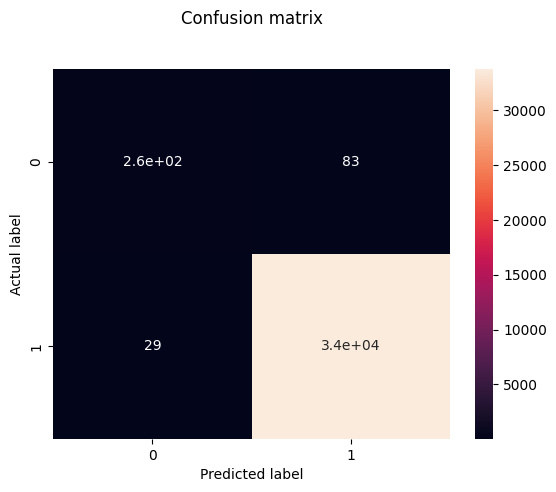

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test,y_test_predicted)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [399]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_test_predicted))

Accuracy: 0.9967200632559229


In [400]:
cnf_matrix

array([[  260,    83],
       [   29, 33775]], dtype=int64)

In [401]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]


print("\nTrue Positives : ",cnf_matrix[0][0])
print("\nFalse Positives : ",cnf_matrix[0][1])
print("\nFalse Negatives : ",cnf_matrix[1][0])
print("\nTrue Negatives : ",cnf_matrix[1][1])


print("\n Accuracy : ",metrics.accuracy_score(Y_test,y_test_predicted))

print()
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predicted))


True Positives :  260

False Positives :  83

False Negatives :  29

True Negatives :  33775

 Accuracy :  0.9967200632559229

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       343
           1       1.00      1.00      1.00     33804

    accuracy                           1.00     34147
   macro avg       0.95      0.88      0.91     34147
weighted avg       1.00      1.00      1.00     34147



In [402]:
X = scaler.fit_transform(X)
Y = df_hh['che_2_25']

In [403]:
print(X)

[[-1.69472856 -0.83820586  1.48542839 ... -0.05761473  0.6062347
   0.45916511]
 [-1.69472855 -0.39163955 -1.08470029 ... -0.38518098 -0.42218889
  -0.30677077]
 [-1.69472688  0.50149307  1.48542839 ...  0.12562021  2.48159536
   0.85103929]
 ...
 [ 1.67651405  0.94805938 -0.76343421 ...  0.25966732 -0.24070238
   1.01135145]
 [ 1.67651407  0.94805938 -0.76343421 ...  0.28229255 -0.70046822
   0.6551022 ]
 [ 1.67651574 -0.83820586 -0.44216812 ... -1.00411311 -0.60367541
  -0.69864495]]


In [404]:
print(Y)

0         1
1         1
2         1
3         1
4         1
         ..
113818    1
113819    1
113820    1
113821    1
113822    1
Name: che_2_25, Length: 113823, dtype: int32


In [405]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=5)

In [406]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [407]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 23.52222222222222, 'Predicted label')

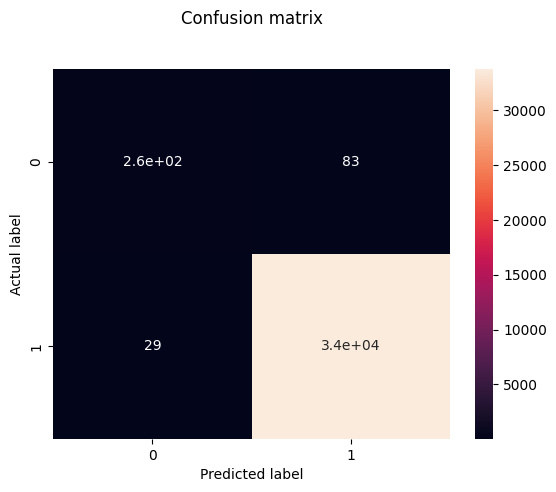

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test,y_test_predicted)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [409]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_test_predicted))

Accuracy: 0.9967200632559229


In [410]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]


print("\nTrue Positives : ",cnf_matrix[0][0])
print("\nFalse Positives : ",cnf_matrix[0][1])
print("\nFalse Negatives : ",cnf_matrix[1][0])
print("\nTrue Negatives : ",cnf_matrix[1][1])


print("\n Accuracy : ",metrics.accuracy_score(Y_test,y_test_predicted))

print()
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predicted))


True Positives :  260

False Positives :  83

False Negatives :  29

True Negatives :  33775

 Accuracy :  0.9967200632559229

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       343
           1       1.00      1.00      1.00     33804

    accuracy                           1.00     34147
   macro avg       0.95      0.88      0.91     34147
weighted avg       1.00      1.00      1.00     34147



In [411]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [412]:
# svc = SVC(C=1.0, kernel='rbf', gamma='auto') 
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)

In [413]:
# print("MSE:", mean_squared_error(Y_test, Y_pred))
# print("MAE:", mean_absolute_error(Y_test, Y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
# print("R2 Score:",metrics.r2_score(Y_te>st, Y_pred))
# print("Accuracy Score for SVC:", accuracy_score(Y_test, Y_pred))